# Rainfall time-series dataset released by WFP 

The data regarding the rainfalls are provided by the WFP: https://dataviz.vam.wfp.org/seasonal_explorer/rainfall_vegetation/visualizations#

We have collected only the data of the adminstratas considered in the *Food Consumption Score* and *Reduced Coping Strategy Index* surveys.

In [1]:
import pandas as pd
import numpy as np
import ntpath
import glob

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../../packages/")
from map_plot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by wfp regarding the rainfall stored in the 'wfp_data' folder.
path = "./wfp_data/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    all_subfolders = glob.glob(path + country + "/Rainfall/*")
    for subfolder in all_subfolders:
        adminstrata = ntpath.basename(subfolder).split(".")[0]
        # All the files of the years.
        all_files = glob.glob(subfolder + "/*.csv")
        for filename in all_files:
            df = pd.read_csv(filename, index_col = False)
            df["AdminStrata"] = adminstrata
            df["Country"] = country
            dfs.append(df)

In [5]:
# Select only the data beyond this year (the year is chosen based on the coverage of the fcs survey).
year = 2018

In [6]:
# Concatenate data.
df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete the duplicate rows of the dataframe (some date have duplicate information due to loading data from different files).
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df = df.loc[df.Year >= year]
df.head()

,Year,Month,Dekad,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average,AdminStrata,Country
72,2018,1,1,100.00,46.675774,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
73,2018,1,2,100.00,67.508865,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
74,2018,1,3,100.00,99.739753,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
75,2018,2,1,100.00,101.329070,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
76,2018,2,2,100.07,100.389922,0.007,0.0,Boucle-Du-Mouhoun,Burkina Faso


### Brief items description

- *Year*: reference year of the data collection.
- *Month*: reference month of the data collection.
- *Dekad*: reference month dekad of the data collection: these correspond to the calendar dates 1-10, 11-20, and 21-end of each month.
- *1 Month Anomaly (%)*: the value of 1 month rainfall anomaly in the reference period.
- *3 Months Anomaly (%)*: the value of 3 month rainfall anomaly in the reference period.
- *Value*: rainfall amount in the reference period.
- *Average*: long-term rainfall average for the same period.
- *AdminStrata*: the adminstrata information of the reference country.
- *Country*: the country information.

### Country item

In [7]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### AdminStrata item

In [8]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the governorates of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago.  The rainfall dataframe has the values of all the governorates.

In [9]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah',
       'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran',
       'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah',
       "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz'], dtype=object)

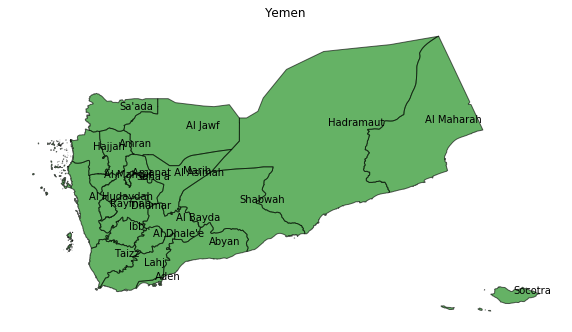

In [10]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], "../Shape Files/shapefiles/Yemen/administrative level 1", figsize = (10, 7), 
                  cmap = "ocean", annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_rainfall_yemen.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 states. It also includes The Federal Capital Territory that is not a state and it is under the direct control of the federal government. The AdminStrata items of the rainfall dataframe cover 3 states: Adamawa, Borno and Yobe.

In [11]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(3,)


array(['Adamawa', 'Borno', 'Yobe'], dtype=object)

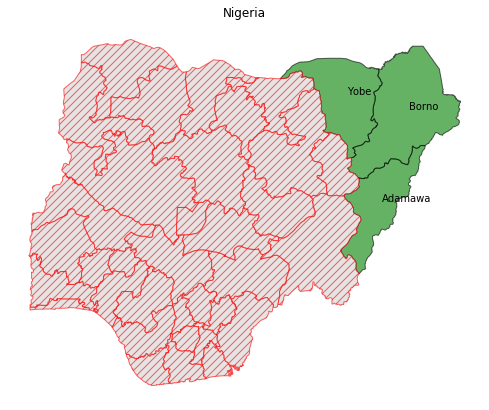

In [12]:
draw_adminstratas("Nigeria", AdminStratas["Nigeria"], "../Shape Files/shapefiles/Nigeria/administrative level 1", figsize = (10, 7), annotation = True, 
                  cmap = "ocean", annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_rainfall_nigeria.png", dpi = 300)

- **Syria (SYR)**: the governatores of the Syria country are 14. The rainfall dataframe has the values of 13 governorates (Idleb governatore not included).

In [13]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Al-Hasakeh', 'Aleppo', 'Ar-Raqqa', 'As-Sweida', 'Damascus',
       "Dar'a", 'Deir-ez-Zor', 'Hama', 'Homs', 'Lattakia', 'Quneitra',
       'Rural Damascus', 'Tartous'], dtype=object)

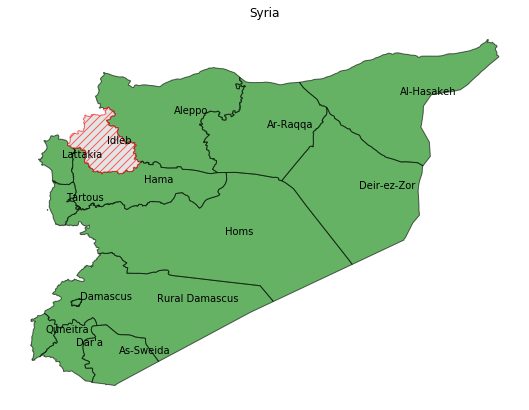

In [14]:
draw_adminstratas("Syria", AdminStratas["Syria"], "../Shape Files/shapefiles/Syria/administrative level 1", figsize = (10, 7), 
                  cmap = "ocean", annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Syria/map_rainfall_syria.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The rainfall dataframe has the values of all 13 regions.

In [15]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Boucle-Du-Mouhoun', 'Cascades', 'Centre', 'Centre-Est',
       'Centre-Nord', 'Centre-Ouest', 'Centre-Sud', 'Est',
       'Hauts-Bassins', 'Nord', 'Plateau-Central', 'Sahel', 'Sud-Ouest'],
      dtype=object)

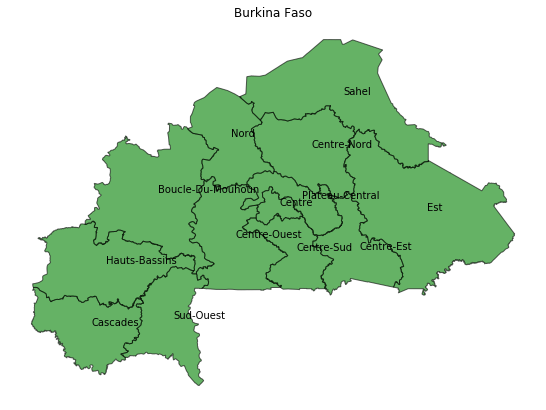

In [16]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], "../Shape Files/shapefiles/Burkina Faso/administrative level 1", figsize = (10, 7), 
                  cmap = "ocean", annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_rainfall_burkina.png", dpi = 300)

## Creation of the time-series

We create the time-series using the information: 1 Month Anomaly (%), 3 Month Anomaly (%) and the amount of rainfall.

In [17]:
# Convert the dekads to proper pandas datetime format.
# These correspond to the calendar dates 1-10, 11-20, and 21-end of each month.
def dekad_to_day(row):
    date = pd.to_datetime(str(row["Year"]) + "-" + str(row["Month"]) + "-01")
    end_month = date.days_in_month
    dekad = row.Dekad   
    if dekad == 1:
        return 10
    if dekad == 2:
        return 20
    if dekad == 3:
        return end_month
    
df["Day"] = df.apply(dekad_to_day, axis = 1)
df.head()

,Year,Month,Dekad,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average,AdminStrata,Country,Day
72,2018,1,1,100.00,46.675774,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,10
73,2018,1,2,100.00,67.508865,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,20
74,2018,1,3,100.00,99.739753,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,31
75,2018,2,1,100.00,101.329070,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso,10
76,2018,2,2,100.07,100.389922,0.007,0.0,Boucle-Du-Mouhoun,Burkina Faso,20


In [18]:
# Adjusting the dataframe.
df.drop(columns = "Dekad", inplace = True)
data = pd.to_datetime(df[["Year", "Month", "Day"]])
df.insert(1, "Datetime", data)
df.drop(["Year", "Month", "Day"], axis = 1, inplace = True)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average,AdminStrata,Country
0,2018-01-10,100.000000,46.675774,0.000,0.000,Boucle-Du-Mouhoun,Burkina Faso
1,2018-01-10,100.000000,70.595816,0.000,0.000,Borno,Nigeria
2,2018-01-10,118.190719,116.182829,0.143,0.000,Amanat Al Asimah,Yemen
3,2018-01-10,100.000000,86.517022,0.000,0.000,Yobe,Nigeria
4,2018-01-10,108.187844,108.496547,0.821,0.577,Al Mahwit,Yemen


In [19]:
# Resampling the data to daily frequency.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Datetime,1 Month Anomaly (%),3 Months Anomaly (%),Value,Average
0,Burkina Faso,Boucle-Du-Mouhoun,2018-01-10,100.0,46.675774,0.0,0.0
1,Burkina Faso,Boucle-Du-Mouhoun,2018-01-11,NaN,NaN,NaN,NaN
2,Burkina Faso,Boucle-Du-Mouhoun,2018-01-12,NaN,NaN,NaN,NaN
3,Burkina Faso,Boucle-Du-Mouhoun,2018-01-13,NaN,NaN,NaN,NaN
4,Burkina Faso,Boucle-Du-Mouhoun,2018-01-14,NaN,NaN,NaN,NaN


In [20]:
# Rename some columns.
df.rename(columns = {"3 Months Anomaly (%)": "3 Months Anomaly (%) Rainfall", "Value": "Rainfall (mm)", "1 Month Anomaly (%)": "1 Month Anomaly (%) Rainfall"}, inplace = True)
# Delete average column (not of interest).
df.drop(columns = "Average", inplace = True)

In [21]:
# Create multi-index column dataframe.
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"]).reorder_levels([1, 2, 0], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
df.columns.rename("Country", level = 0, inplace = True)
df.columns.rename("AdminStrata", level = 1, inplace = True)
df.columns.rename("Indicator", level = 2, inplace = True)
freq = "D"
df.index.freq = freq
df.head()

Country                     Burkina Faso                                \
AdminStrata            Boucle-Du-Mouhoun                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                         100.0                     46.675774   
2018-01-11                           NaN                           NaN   
2018-01-12                           NaN                           NaN   
2018-01-13                           NaN                           NaN   
2018-01-14                           NaN                           NaN   

Country                                                 \
AdminStrata                                   Cascades   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10            0.0                   105.088605   
2018-01-11            NaN                          NaN   
2018-01-12            NaN                          NaN   
2018-01-13            NaN                          NaN   
2018-01-14            NaN                          NaN   

Country                                                  \
AdminStrata                                               
Indicator   3 Months Anomaly (%) Rainfall Rainfall (mm)   
Datetime                                                  
2018-01-10                      45.040303         0.027   
2018-01-11                            NaN           NaN   
2018-01-12                            NaN           NaN   
2018-01-13                            NaN           NaN   
2018-01-14                            NaN           NaN   

Country                                                                 \
AdminStrata                       Centre                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                         100.0                      76.26391   
2018-01-11                           NaN                           NaN   
2018-01-12                           NaN                           NaN   
2018-01-13                           NaN                           NaN   
2018-01-14                           NaN                           NaN   

Country                                                 ...         Yemen  \
AdminStrata                                 Centre-Est  ...        Sana'a   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall  ... Rainfall (mm)   
Datetime                                                ...                 
2018-01-10            0.0                   101.619352  ...          0.95   
2018-01-11            NaN                          NaN  ...           NaN   
2018-01-12            NaN                          NaN  ...           NaN   
2018-01-13            NaN                          NaN  ...           NaN   
2018-01-14            NaN                          NaN  ...           NaN   

Country                                                                 \
AdminStrata                      Shabwah                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                    105.149317                    108.365589   
2018-01-11                           NaN                           NaN   
2018-01-12                           NaN                           NaN   
2018-01-13                           NaN                           NaN   
2018-01-14                           NaN                           NaN   

Country                                                 \
AdminStrata                                    Socotra   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10        

In [22]:
# Keep the dekads date.
df = df.loc[(df.index.day == 10) | (df.index.day == 20) | (df.index.is_month_end)]
df = df.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(lambda x: x.loc[x.first_valid_index():x.last_valid_index()])
df.head()

Country                     Burkina Faso                                \
AdminStrata            Boucle-Du-Mouhoun                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                        100.00                     46.675774   
2018-01-20                        100.00                     67.508865   
2018-01-31                        100.00                     99.739753   
2018-02-10                        100.00                    101.329070   
2018-02-20                        100.07                    100.389922   

Country                                                 \
AdminStrata                                   Cascades   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10          0.000                   105.088605   
2018-01-20          0.000                   102.675818   
2018-01-31          0.000                   100.328456   
2018-02-10          0.000                   116.900029   
2018-02-20          0.007                   119.447241   

Country                                                  \
AdminStrata                                               
Indicator   3 Months Anomaly (%) Rainfall Rainfall (mm)   
Datetime                                                  
2018-01-10                      45.040303         0.027   
2018-01-20                      58.606953         0.020   
2018-01-31                     112.112356         0.033   
2018-02-10                     123.595840         1.886   
2018-02-20                     125.107418         1.133   

Country                                                                 \
AdminStrata                       Centre                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                         100.0                     76.263910   
2018-01-20                         100.0                     99.588561   
2018-01-31                         100.0                    100.600216   
2018-02-10                         100.0                    100.000000   
2018-02-20                         100.1                    100.100000   

Country                                                 ...         Yemen  \
AdminStrata                                 Centre-Est  ...        Sana'a   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall  ... Rainfall (mm)   
Datetime                                                ...                 
2018-01-10           0.00                   101.619352  ...         0.950   
2018-01-20           0.00                   101.279744  ...         0.647   
2018-01-31           0.00                   100.000000  ...         1.114   
2018-02-10           0.00                   101.258993  ...         2.328   
2018-02-20           0.01                   104.198664  ...         2.376   

Country                                                                 \
AdminStrata                      Shabwah                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                    105.149317                    108.365589   
2018-01-20                    104.986301                    109.041046   
2018-01-31                    104.754504                    109.105315   
2018-02-10                    107.755281                    111.777320   
2018-02-20                    108.963067                    111.735197   

Country                                                 \
AdminStrata                                    Socotra   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10        

In [23]:
# Now check if it is necessary interpolate the nan values at dekadly frequency.
# Check if the dataframe contains NaN values in correspondence of the dekades.
print("Check if the dataframe contains NaN values:")
check_nan = df.groupby(axis = 1, level = [0, 1, 2]).apply(lambda x: x.loc[x.first_valid_index():x.last_valid_index()].isnull().sum(axis = 1).sum())
check_nan

Check if the dataframe contains NaN values:


Country       AdminStrata        Indicator                    
Burkina Faso  Boucle-Du-Mouhoun  1 Month Anomaly (%) Rainfall     0
                                 3 Months Anomaly (%) Rainfall    0
                                 Rainfall (mm)                    0
              Cascades           1 Month Anomaly (%) Rainfall     0
                                 3 Months Anomaly (%) Rainfall    0
                                                                 ..
Yemen         Socotra            3 Months Anomaly (%) Rainfall    0
                                 Rainfall (mm)                    0
              Taizz              1 Month Anomaly (%) Rainfall     0
                                 3 Months Anomaly (%) Rainfall    0
                                 Rainfall (mm)                    0
Length: 153, dtype: int64

In [24]:
# Total nan values.
check_nan.sum()

0

In [25]:
# Resample data to daily level (as before) reobtaining the dekadly frequency.
df_dekad = df.groupby(axis = 1, level = [0, 1, 2], group_keys = False).resample("D").mean()
freq = "D"
df_dekad.index.freq = freq
df_dekad.head()

Country                     Burkina Faso                                \
AdminStrata            Boucle-Du-Mouhoun                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                         100.0                     46.675774   
2018-01-11                           NaN                           NaN   
2018-01-12                           NaN                           NaN   
2018-01-13                           NaN                           NaN   
2018-01-14                           NaN                           NaN   

Country                                                 \
AdminStrata                                   Cascades   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10            0.0                   105.088605   
2018-01-11            NaN                          NaN   
2018-01-12            NaN                          NaN   
2018-01-13            NaN                          NaN   
2018-01-14            NaN                          NaN   

Country                                                  \
AdminStrata                                               
Indicator   3 Months Anomaly (%) Rainfall Rainfall (mm)   
Datetime                                                  
2018-01-10                      45.040303         0.027   
2018-01-11                            NaN           NaN   
2018-01-12                            NaN           NaN   
2018-01-13                            NaN           NaN   
2018-01-14                            NaN           NaN   

Country                                                                 \
AdminStrata                       Centre                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                         100.0                      76.26391   
2018-01-11                           NaN                           NaN   
2018-01-12                           NaN                           NaN   
2018-01-13                           NaN                           NaN   
2018-01-14                           NaN                           NaN   

Country                                                 ...         Yemen  \
AdminStrata                                 Centre-Est  ...        Sana'a   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall  ... Rainfall (mm)   
Datetime                                                ...                 
2018-01-10            0.0                   101.619352  ...          0.95   
2018-01-11            NaN                          NaN  ...           NaN   
2018-01-12            NaN                          NaN  ...           NaN   
2018-01-13            NaN                          NaN  ...           NaN   
2018-01-14            NaN                          NaN  ...           NaN   

Country                                                                 \
AdminStrata                      Shabwah                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                    105.149317                    108.365589   
2018-01-11                           NaN                           NaN   
2018-01-12                           NaN                           NaN   
2018-01-13                           NaN                           NaN   
2018-01-14                           NaN                           NaN   

Country                                                 \
AdminStrata                                    Socotra   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10        

In [26]:
# Plot the time-series.
TsIP(df_dekad).interactive_plot_df(matplotlib = False, style = "mix", yaxis = "Rainfall", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [27]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [28]:
df_dekad.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rainfall-dekad"));

## Adjustment of the rainfall time-series to the daily time coverage of the FCS survey

Now, we manage the current data keeping only the adminstratas present in the FCS survey. Furthermore, we aggregate data following the FCS data collection: the FCS value of a certain province corresponding to a referece date does not correspond to the percentage of poor and borderline people on that day, but rather in a greater time range. For example, for the provinces of Yemen it corresponds to the percentage of poor and borderline people in the previous 31 days. We therefore adapt the time-series of the rainfall to take into account this consideration.

In [29]:
def daily_fit(group):
    indicator = group.name[2]
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    if indicator == "Rainfall (mm)":
        # We get the group with time-step of the day filling nan values with previous value dekad.
        group = group.fillna(method = "bfill")
        # Furthermore, being the values of the dekaed the tot rainfall happened in that interval we divide for the days in the range of the corresponding dekad.
        def dekad_day_norm(row):
            if row.name.day >= 1 or row.name.day <= 10:
                return row/10
            if row.name.day >= 11 or row.name.day <= 20:
                return row/10
            if row.name.day >= 21:
                return row/(row.name.days_in_month-20)
        group = group.apply(dekad_day_norm, axis = 1)
    else:
        group = group.interpolate(method = "linear")
        
    return group

df_fit_day = df_dekad.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(daily_fit)
df_fit_day.head()

Country                     Burkina Faso                                \
AdminStrata            Boucle-Du-Mouhoun                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                         100.0                     46.675774   
2018-01-11                         100.0                     48.759083   
2018-01-12                         100.0                     50.842392   
2018-01-13                         100.0                     52.925701   
2018-01-14                         100.0                     55.009011   

Country                                                 \
AdminStrata                                   Cascades   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10            0.0                   105.088605   
2018-01-11            0.0                   104.847326   
2018-01-12            0.0                   104.606048   
2018-01-13            0.0                   104.364769   
2018-01-14            0.0                   104.123490   

Country                                                  \
AdminStrata                                               
Indicator   3 Months Anomaly (%) Rainfall Rainfall (mm)   
Datetime                                                  
2018-01-10                      45.040303        0.0027   
2018-01-11                      46.396968        0.0020   
2018-01-12                      47.753633        0.0020   
2018-01-13                      49.110298        0.0020   
2018-01-14                      50.466963        0.0020   

Country                                                                 \
AdminStrata                       Centre                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                         100.0                     76.263910   
2018-01-11                         100.0                     78.596375   
2018-01-12                         100.0                     80.928840   
2018-01-13                         100.0                     83.261305   
2018-01-14                         100.0                     85.593770   

Country                                                 ...         Yemen  \
AdminStrata                                 Centre-Est  ...        Sana'a   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall  ... Rainfall (mm)   
Datetime                                                ...                 
2018-01-10            0.0                   101.619352  ...        0.0950   
2018-01-11            0.0                   101.585391  ...        0.0647   
2018-01-12            0.0                   101.551431  ...        0.0647   
2018-01-13            0.0                   101.517470  ...        0.0647   
2018-01-14            0.0                   101.483509  ...        0.0647   

Country                                                                 \
AdminStrata                      Shabwah                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-01-10                    105.149317                    108.365589   
2018-01-11                    105.133016                    108.433135   
2018-01-12                    105.116714                    108.500681   
2018-01-13                    105.100412                    108.568226   
2018-01-14                    105.084111                    108.635772   

Country                                                 \
AdminStrata                                    Socotra   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-01-10        

In [30]:
fcs_coverage = {"Yemen": 31, "Syria": 31, "Nigeria": 31, "Burkina Faso": 56}

In [31]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Ignore the adminstrata not considered in the fcs survey.
    fcs_timeseries = pd.read_csv("../Food Consumption Score (FCS)/output_timeseries/%s/wfp_fcs-interpolate.csv" % country, header = [0, 1], index_col = 0)
    if adminstrata in fcs_timeseries.columns.get_level_values(0).unique():
        # Sliding window according to the coverage of the fcs survey.
        if indicator == "Rainfall (mm)":
            group = group.rolling(fcs_coverage[country]).sum()  
        else:
            group = group.rolling(fcs_coverage[country]).mean()  
        return group.loc[group.first_valid_index():group.last_valid_index()]
    else:
        pass
    
df_SvyWindow = df_fit_day.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_SvyWindow.head()

Country                     Burkina Faso                                \
AdminStrata            Boucle-Du-Mouhoun                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-02-09                           NaN                           NaN   
2018-02-10                           NaN                           NaN   
2018-02-11                           NaN                           NaN   
2018-02-12                           NaN                           NaN   
2018-02-13                           NaN                           NaN   

Country                                                 \
AdminStrata                                   Cascades   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-02-09            NaN                          NaN   
2018-02-10            NaN                          NaN   
2018-02-11            NaN                          NaN   
2018-02-12            NaN                          NaN   
2018-02-13            NaN                          NaN   

Country                                                  \
AdminStrata                                               
Indicator   3 Months Anomaly (%) Rainfall Rainfall (mm)   
Datetime                                                  
2018-02-09                            NaN           NaN   
2018-02-10                            NaN           NaN   
2018-02-11                            NaN           NaN   
2018-02-12                            NaN           NaN   
2018-02-13                            NaN           NaN   

Country                                                                 \
AdminStrata                       Centre                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-02-09                           NaN                           NaN   
2018-02-10                           NaN                           NaN   
2018-02-11                           NaN                           NaN   
2018-02-12                           NaN                           NaN   
2018-02-13                           NaN                           NaN   

Country                                                 ...         Yemen  \
AdminStrata                                 Centre-Est  ...        Sana'a   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall  ... Rainfall (mm)   
Datetime                                                ...                 
2018-02-09            NaN                          NaN  ...        4.0626   
2018-02-10            NaN                          NaN  ...        4.2004   
2018-02-11            NaN                          NaN  ...        4.3733   
2018-02-12            NaN                          NaN  ...        4.5462   
2018-02-13            NaN                          NaN  ...        4.7191   

Country                                                                 \
AdminStrata                      Shabwah                                 
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-02-09                    105.338660                    109.340176   
2018-02-10                    105.422723                    109.450232   
2018-02-11                    105.511209                    109.557973   
2018-02-12                    105.604116                    109.663400   
2018-02-13                    105.701445                    109.766511   

Country                                                 \
AdminStrata                                    Socotra   
Indicator   Rainfall (mm) 1 Month Anomaly (%) Rainfall   
Datetime                                                 
2018-02-09        

In [32]:
# Plot the time-series.
TsIP(df_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Rainfall", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [33]:
df_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rainfall-day"));